In [428]:
import pandas as pd
import numpy as nps

In [429]:
%matplotlib inline

In [430]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot

# init_notebook_mode()


import cufflinks as cf
import numpy as np

# import plotly.tools as tls
# tls.embed('https://plot.ly/~cufflinks/8')


In [431]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=9).fillna(0)

In [432]:
df.head()

,Leerfläche (m²),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Leerfläche (m²).1,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Leerflächenziffer,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Leerfläche (m²).2,Unnamed: 16,Unnamed: 17,Unnamed: 18
NaN,2018,2017,2016,2015.0,2014,2018,2017,2016,2015,2014,2018.000000,2017.000000,2016.000000,2015.000000,2014.000000,2018,2018,2018,2018
Ganze Stadt,187714,243660,237054,256450.0,264548,139664,174381,193027,207901,214900,1.820000,2.294606,2.550520,2.757742,2.919305,31663,5381,5122,5884
Kreis 1,30550,34710,32201,40945.0,53774,23805,29535,29807,36180,49692,3.009313,3.722381,3.713889,4.494553,6.442308,2436,1889,214,2206
Rathaus,3504,1940,2261,2261.0,2284,1399,1940,1315,2113,1856,1.312454,1.828309,1.280151,2.055668,1.791554,128,383,64,1530
Hochschulen,670,1187,340,126.0,2218,670,797,340,126,2218,0.870212,1.018492,0.414879,0.147865,2.591527,0,0,0,0


In [433]:
df.dtypes

Leerfläche (m²)        int64
Unnamed: 1             int64
Unnamed: 2             int64
Unnamed: 3           float64
Unnamed: 4             int64
Leerfläche (m²).1      int64
Unnamed: 6             int64
Unnamed: 7             int64
Unnamed: 8             int64
Unnamed: 9             int64
Leerflächenziffer    float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Leerfläche (m²).2      int64
Unnamed: 16            int64
Unnamed: 17            int64
Unnamed: 18            int64
dtype: object

In [434]:
df.columns

Index(['Leerfläche (m²)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Leerfläche (m²).1', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Leerflächenziffer', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Leerfläche (m²).2',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [435]:
df.shape

(48, 19)

------------

# Leerflächen Gewerbe total nach Quartier von 2014 bis 2018

In [436]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=10).fillna(0)
# .astype(int)

In [437]:
df.head()

,2018,2017,2016,2015,2014,2018.1,2017.1,2016.1,2015.1,2014.1,2018.2,2017.2,2016.2,2015.2,2014.2,2018.3,2018.4,2018.5,2018.6
Ganze Stadt,187714,243660,237054,256450.0,264548,139664,174381,193027,207901,214900,1.820000,2.294606,2.550520,2.757742,2.919305,31663,5381,5122,5884
Kreis 1,30550,34710,32201,40945.0,53774,23805,29535,29807,36180,49692,3.009313,3.722381,3.713889,4.494553,6.442308,2436,1889,214,2206
Rathaus,3504,1940,2261,2261.0,2284,1399,1940,1315,2113,1856,1.312454,1.828309,1.280151,2.055668,1.791554,128,383,64,1530
Hochschulen,670,1187,340,126.0,2218,670,797,340,126,2218,0.870212,1.018492,0.414879,0.147865,2.591527,0,0,0,0
Lindenhof,7542,10304,8060,7737.0,7381,6963,8158,7725,7374,6967,3.940022,4.657459,4.368561,4.170103,4.011771,579,0,0,0


In [438]:
df_leerflaeche_total = df.iloc[0:,0:5]

In [439]:
df_leerflaeche_total.head()

,2018,2017,2016,2015,2014
Ganze Stadt,187714,243660,237054,256450.0,264548
Kreis 1,30550,34710,32201,40945.0,53774
Rathaus,3504,1940,2261,2261.0,2284
Hochschulen,670,1187,340,126.0,2218
Lindenhof,7542,10304,8060,7737.0,7381


In [440]:
df_quartiere = df_leerflaeche_total.drop(['Ganze Stadt', 'Kreis 1', 'Kreis 2', 'Kreis 3',
                                          'Kreis 4', 'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8',
                                          'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12'])

In [441]:
df_quartiere.head()

,2018,2017,2016,2015,2014
Rathaus,3504,1940,2261,2261.0,2284
Hochschulen,670,1187,340,126.0,2218
Lindenhof,7542,10304,8060,7737.0,7381
City,18834,21279,21540,30821.0,41891
Wollishofen,2220,4227,5313,3790.0,9101


In [442]:
df_quartiere.index.name='Quartier'

In [443]:
df_quartiere

,2018,2017,2016,2015,2014
Quartier,,,,,
Rathaus,3504,1940,2261,2261.0,2284
Hochschulen,670,1187,340,126.0,2218
Lindenhof,7542,10304,8060,7737.0,7381
City,18834,21279,21540,30821.0,41891
Wollishofen,2220,4227,5313,3790.0,9101
Leimbach,0,0,0,0.0,401
Enge,20980,20946,14126,26557.0,24734
Alt-Wiedikon,16268,16327,19741,33457.0,26935
Friesenberg,0,0,0,0.0,0


In [444]:
df_quartiere.columns

Index([2018, 2017, 2016, 2015, 2014], dtype='object')

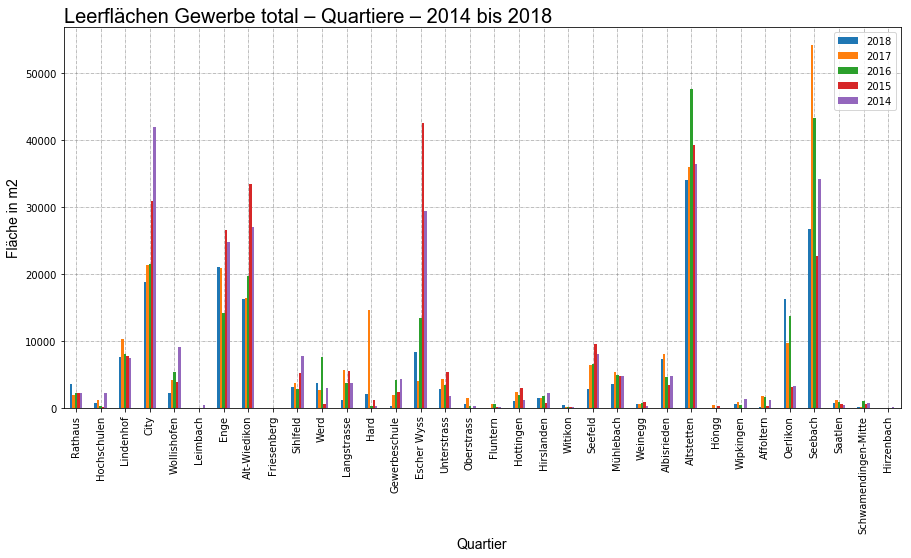

In [445]:
fig, ax = plt.subplots()
df_quartiere.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe total – Quartiere – 2014 bis 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Quartier", fontdict=label_font)
ax.yaxis.set_label_position('left')

# df1.plot(kind='bar', figsize=(15,7))

------------

# Leerflächen Gewerbe nach Stadtkreisen im 2014 bis 2018

In [446]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=10).fillna(0)

In [447]:
df.index

Index(['Ganze Stadt', 'Kreis 1', 'Rathaus', 'Hochschulen', 'Lindenhof', 'City',
       'Kreis 2', 'Wollishofen', 'Leimbach', 'Enge', 'Kreis 3', 'Alt-Wiedikon',
       'Friesenberg', 'Sihlfeld', 'Kreis 4', 'Werd', 'Langstrasse', 'Hard',
       'Kreis 5', 'Gewerbeschule', 'Escher Wyss', 'Kreis 6', 'Unterstrass',
       'Oberstrass', 'Kreis 7', 'Fluntern', 'Hottingen', 'Hirslanden',
       'Witikon', 'Kreis 8', 'Seefeld', 'Mühlebach', 'Weinegg', 'Kreis 9',
       'Albisrieden', 'Altstetten', 'Kreis 10', 'Höngg', 'Wipkingen',
       'Kreis 11', 'Affoltern', 'Oerlikon', 'Seebach', 'Kreis 12', 'Saatlen',
       'Schwamendingen-Mitte', 'Hirzenbach'],
      dtype='object')

In [448]:
df.columns

Index([    2018,     2017,     2016,     2015,     2014, '2018.1', '2017.1',
       '2016.1', '2015.1', '2014.1', '2018.2', '2017.2', '2016.2', '2015.2',
       '2014.2', '2018.3', '2018.4', '2018.5', '2018.6'],
      dtype='object')

In [449]:
df_kreise = df.loc[['Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4',
         'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8', 'Kreis 9',
                    'Kreis 10', 'Kreis 11', 'Kreis 12'], :]


In [450]:
df_kreise_2018 = df_kreise.iloc[:, 0:5]

In [451]:
df_kreise_2018.index.name='Quartier'
df_kreise_2018.head()

,2018,2017,2016,2015,2014
Quartier,,,,,
Kreis 1,30550,34710,32201,40945.0,53774
Kreis 2,23200,25173,19439,30347.0,34236
Kreis 3,19407,20063,22593,38728.0,34681
Kreis 4,6808,22861,11583,7325.0,7046
Kreis 5,8646,5913,17582,44909.0,33643


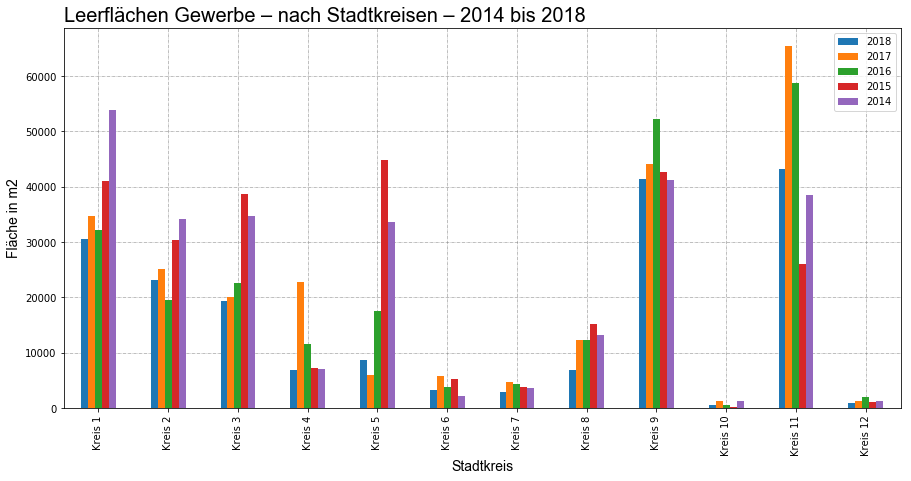

In [452]:
fig, ax = plt.subplots()
df_kreise_2018.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe – nach Stadtkreisen – 2014 bis 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Stadtkreis", fontdict=label_font)
ax.yaxis.set_label_position('left')


# df1.plot(kind='bar', figsize=(15,7))

------------

# Leerflächen Gewerbe nach Kreisen im Jahr 2018

In [453]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=10).fillna(0)

df_kreise = df.loc[['Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4',
                    'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8',
                    'Kreis 9','Kreis 10', 'Kreis 11', 'Kreis 12'], :]

df_kreise_2018 = df_kreise.iloc[:, 0:1]

df_kreise_2018.index.name='Quartier'
df_kreise_2018.head()

,2018
Quartier,
Kreis 1,30550
Kreis 2,23200
Kreis 3,19407
Kreis 4,6808
Kreis 5,8646


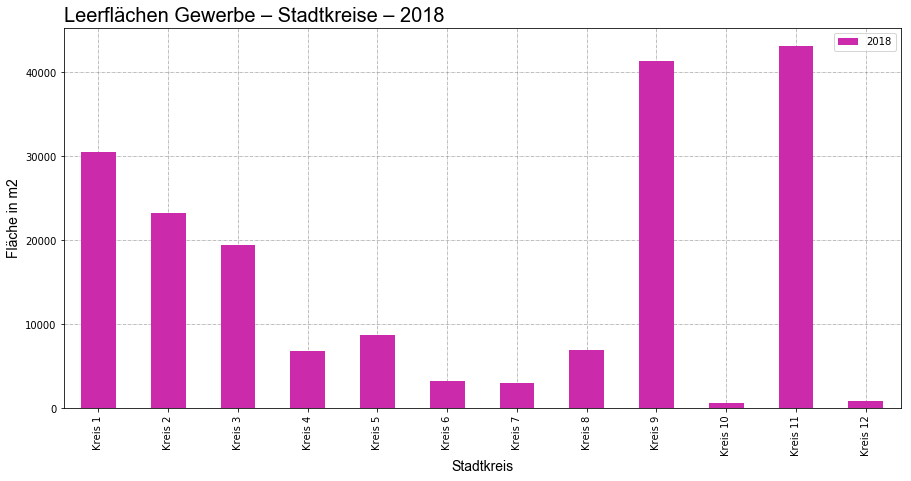

In [454]:
fig, ax = plt.subplots()
df_kreise_2018.plot(kind='bar', figsize=(15,7), color='#CB2AAB', ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe – Stadtkreise – 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Stadtkreis", fontdict=label_font)
ax.yaxis.set_label_position('left')


# df1.plot(kind='bar', figsize=(15,7))

------------

# Leerflächen Gewerbe – Quartiere – 2018

In [500]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=10).fillna(0)
# .astype(int)

df_leerflaeche_total = df.iloc[0:,0:1]
df_quartiere = df_leerflaeche_total.drop(['Ganze Stadt', 'Kreis 1', 'Kreis 2', 'Kreis 3',
                                          'Kreis 4', 'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8',
                                          'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12'])
df_quartiere.index.name='Quartier'
df_quartiere.head()

,2018
Quartier,
Rathaus,3504
Hochschulen,670
Lindenhof,7542
City,18834
Wollishofen,2220


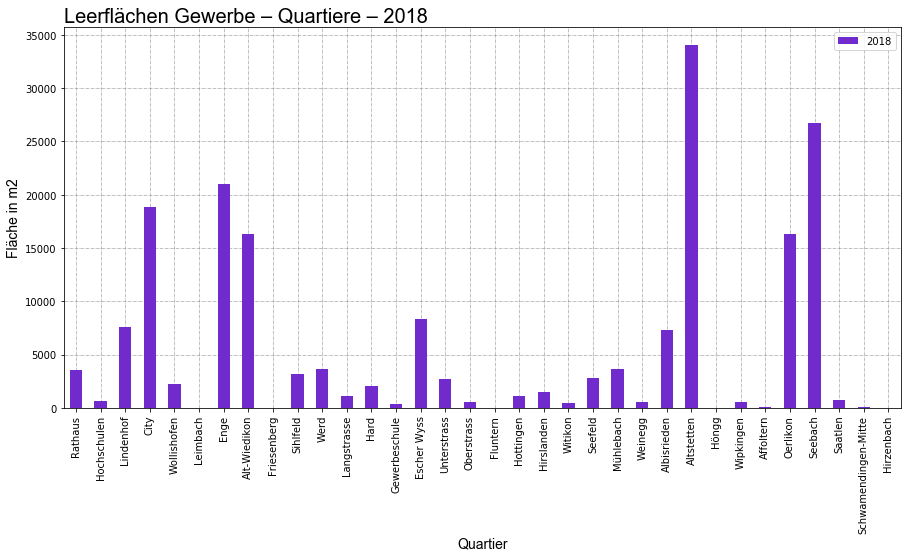

In [501]:
fig, ax = plt.subplots()
df_quartiere.plot(kind='bar', figsize=(15,7), color='#712ACB', ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe – Quartiere – 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Quartier", fontdict=label_font)
ax.yaxis.set_label_position('left')

# df1.plot(kind='bar', figsize=(15,7))

------------

# Leerflächen Gewerbe – nach Art und Stadtkreisen – 2018

In [495]:
df = pd.read_excel('Daten/Gewerbe/Leerflaechen_Nutzungsart-und-Quartier.xlsx',
                   index_col=0, header=8).fillna(0)

df_gewerbe_art = df.loc[['Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4',
                    'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8',
                    'Kreis 9','Kreis 10', 'Kreis 11', 'Kreis 12'], :]
df_gewerbe_art.columns

Index(['Total', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Büro/Praxis', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Lager/\nArchiv', 'Verkauf', 'Werkstatt/\nProduktion',
       'Andere Nutzungen'],
      dtype='object')

In [496]:
df_gewerbe_art.head()

,Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Büro/Praxis,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Lager/ Archiv,Verkauf,Werkstatt/ Produktion,Andere Nutzungen
Kreis 1,30550,34710.0,32201.0,40945.0,53774.0,23805,29535.0,29807.0,36180.0,49692.0,3.00931,3.722381,3.713889,4.494553,6.442308,2436,1889.0,214.0,2206.0
Kreis 2,23200,25173.0,19439.0,30347.0,34236.0,19520,17542.0,14427.0,25972.0,28559.0,2.52306,2.230628,1.882420,3.407398,3.761955,2687,608.0,87.0,298.0
Kreis 3,19407,20063.0,22593.0,38728.0,34681.0,11823,14315.0,19796.0,31223.0,28092.0,1.57,1.936231,2.708227,4.443798,4.170790,4202,543.0,1955.0,884.0
Kreis 4,6808,22861.0,11583.0,7325.0,7046.0,4276,8691.0,8331.0,2564.0,4844.0,0.81456,1.688080,1.672822,0.537578,1.012660,2311,88.0,122.0,11.0
Kreis 5,8646,5913.0,17582.0,44909.0,33643.0,4817,3591.0,17023.0,34975.0,24004.0,0.436385,0.333093,1.523470,3.035953,2.122146,3517,167.0,62.0,83.0


In [497]:
df_gewerbe_art_kreis = df_gewerbe_art.loc[:, ['Büro/Praxis', 'Lager/\nArchiv', 'Verkauf', 'Werkstatt/\nProduktion',
       'Andere Nutzungen']]

In [498]:
df_gewerbe_art_kreis.index.name='Quartier'
df_gewerbe_art_kreis.head()

,Büro/Praxis,Lager/ Archiv,Verkauf,Werkstatt/ Produktion,Andere Nutzungen
Quartier,,,,,
Kreis 1,23805,2436,1889.0,214.0,2206.0
Kreis 2,19520,2687,608.0,87.0,298.0
Kreis 3,11823,4202,543.0,1955.0,884.0
Kreis 4,4276,2311,88.0,122.0,11.0
Kreis 5,4817,3517,167.0,62.0,83.0


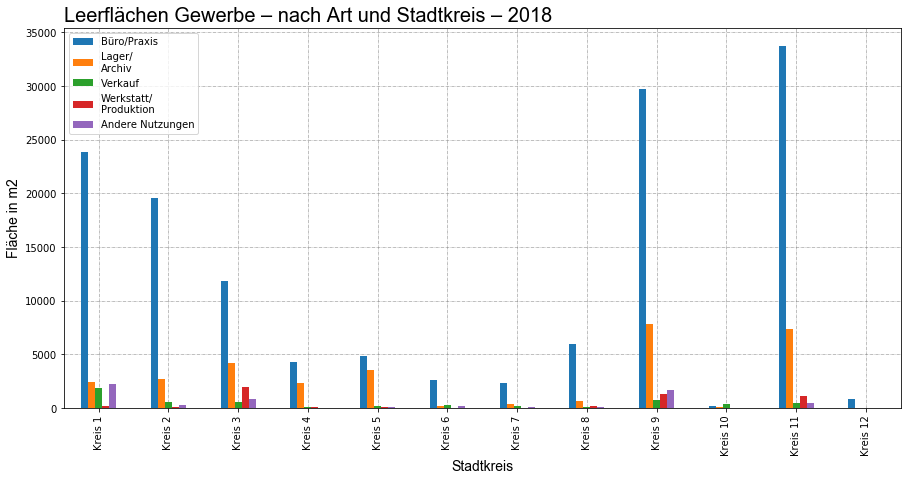

In [499]:
fig, ax = plt.subplots()
df_gewerbe_art_kreis.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe – nach Art und Stadtkreis – 2018', fontdict=title_font, loc='left')

# - Achsenbeschriftungen
label_font = {'fontsize': 14, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_ylabel("Fläche in m2", fontdict=label_font)
ax.set_xlabel("Stadtkreis", fontdict=label_font)
ax.yaxis.set_label_position('left')


Text(0.0, 1.0, 'Leerflächen Gewerbe total – Quartiere –  2014 bis 2018')

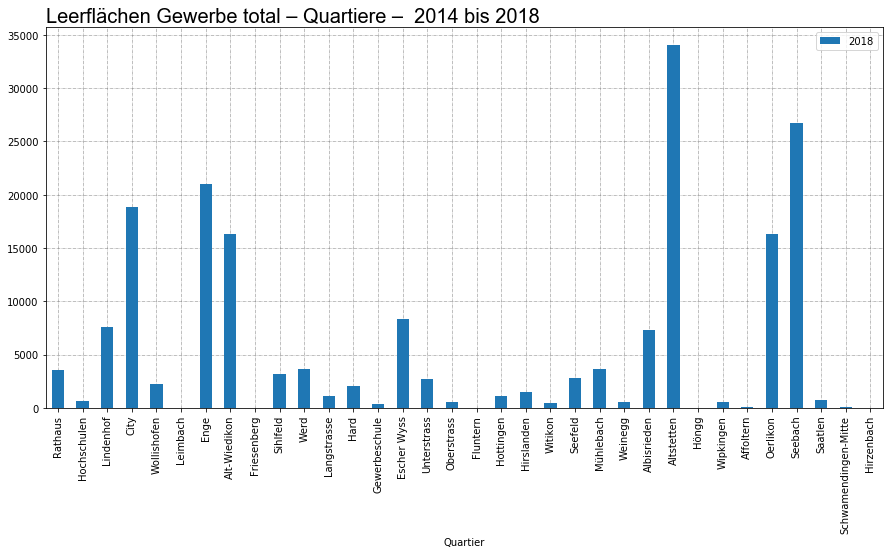

In [360]:
fig, ax = plt.subplots()
df_quartiere.plot(kind='bar', figsize=(15,7), ax=ax)

ax.grid(which='major', linestyle='-.', linewidth='0.5', color='grey')
ax.set_axisbelow(True)

title_font = {'fontsize': 20, 'fontweight': 'normal', 'fontname': 'Arial'}
ax.set_title('Leerflächen Gewerbe total – Quartiere –  2014 bis 2018', fontdict=title_font, loc='left')

# df1.plot(kind='bar', figsize=(15,7))

In [361]:
# #Was man mit der Pandas-Funktion alles machen kann
# ax = df1.plot(kind='bar', 

#         alpha=1,
#         color='darkblue',
#         linewidth=1,
#         figsize=(11,8),
#         grid=False,
#         fontsize=14)

# #Was man separat einstellen kann:

# # - Titel
# title_font = {'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'}
# ax.set_title('Reiche Leute leben länger, aber nicht ewig', fontdict=title_font, loc='left')

# # - Achsenbeschriftungen
# label_font = {'fontsize': 14, 'fontweight': 'bold', 'fontname': 'Comic Sans MS'}
# ax.set_ylabel("Lebenserwartung", fontdict=label_font)
# ax.set_xlabel("BIP pro Kopf", fontdict=label_font)
# ax.yaxis.set_label_position('left')

# # - Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,}'))

# # Gitternetz formatieren
# ax.grid(which='major', linestyle='-.', linewidth='0.5', color='black', )
# ax.minorticks_on()
# ax.grid(which='minor', linestyle='-.', linewidth='0.2', color='blue', )

# # - Rahmenlinien ausschalten
# ax.spines['right'].set_v

isible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)


# # - Hintergrundfarbe
# ax.set_facecolor('#EEEEEE')

NameError: name 'isible' is not defined

In [31]:
# df1.iplot(kind='bar', color='red')

In [ ]:
# df1 = [
#     go.Bar(
#         x=[1, 2, 3],
#         y=[1, 3, 1]
#     )
# ]

# config = {
#     'linkText': "Let's visit plot.ly !!!",
#     'scrollZoom': False,
#     'displayModeBar': True,
#     'editable': True
# }
# iplot(df1, config=config)